code for calculating laser safety. All material is based on ANSI Z136.1-2014.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$MPE=2.0\times10^{-7} J/cm^2$$ for durations between $10^{-11}$ and $5\times10^{-6}$ seconds. Relavent for Rule 1.
$$MPE=1.8\times10^{-3} t_d^{0.75} J/cm^2$$
for durations between $5\times10^{-6}$ and 10 seconds, where $t_d$ is the duration. Relavent for Rule 2. 

$$r_{NOHD}=\frac{1}{\phi}\left(\sqrt{\frac{4\Phi}{\pi MPE}}-a\right)$$ where $r_{NOHD}$ is the range at which the irradiance matches the MPE, $\phi$ is the divergence, $\Phi$ is the optical power, and $a$ is the $1/e$ beam diameter.

In [2]:
# Parameters (measured)

a = 2.0  # [cm] beam diameter 1/e
Phi = 49.15  # [mW] optical power
FWHM = 750e-12  # [s] single pulse duration
PRF = 14.3e3  # [Hz] pulse repetition frequency
phi = 0.2e-3  # [rad] divergence

In [3]:
# MPE calculations
# Rule 1: Single pulse

MPE_sp = 2.0e-7  # [J/cm2] MPE for single pulse for duration between 1e-11 and 5e-6 seconds

# Rule 2: Pulse train
t_dur = 0.25  # [s] duration for eye aversion
MPE_g = 1.8e-3 * t_dur**0.75  # [J/cm2] MPE for group of pulses for duration between 5e-6 and 10 seconds
MPE_gsp = MPE_g / (PRF*t_dur)  # [J/cm2] MPE per pulse

# Select the more restrictive MPE
MPE = MPE_sp if (MPE_sp<=MPE_gsp) else MPE_gsp  # [J/cm2]

MPE_p = MPE * PRF  # [W/cm2] equivalently power

print('MPE (power): {:.2f} mW/cm2'.format(MPE_p*1e3))

MPE (power): 2.55 mW/cm2


In [4]:
# NOHD calculations

r_NOHD = 1/phi*(np.sqrt(4*Phi/np.pi/(MPE_p*1e3))-a)  # [cm] NOHD range
print('NOHD range: {:.2f} m'.format(r_NOHD/100))

NOHD range: 147.91 m


In [5]:
# Plot how NOHD range changes as a function of beam size
a_range = np.linspace(0.1, 5, 100)  # [cm]
r_NOHD_plot = 1/phi*(np.sqrt(4*Phi/np.pi/(MPE_p*1e3))-a_range)  # [cm] NOHD range

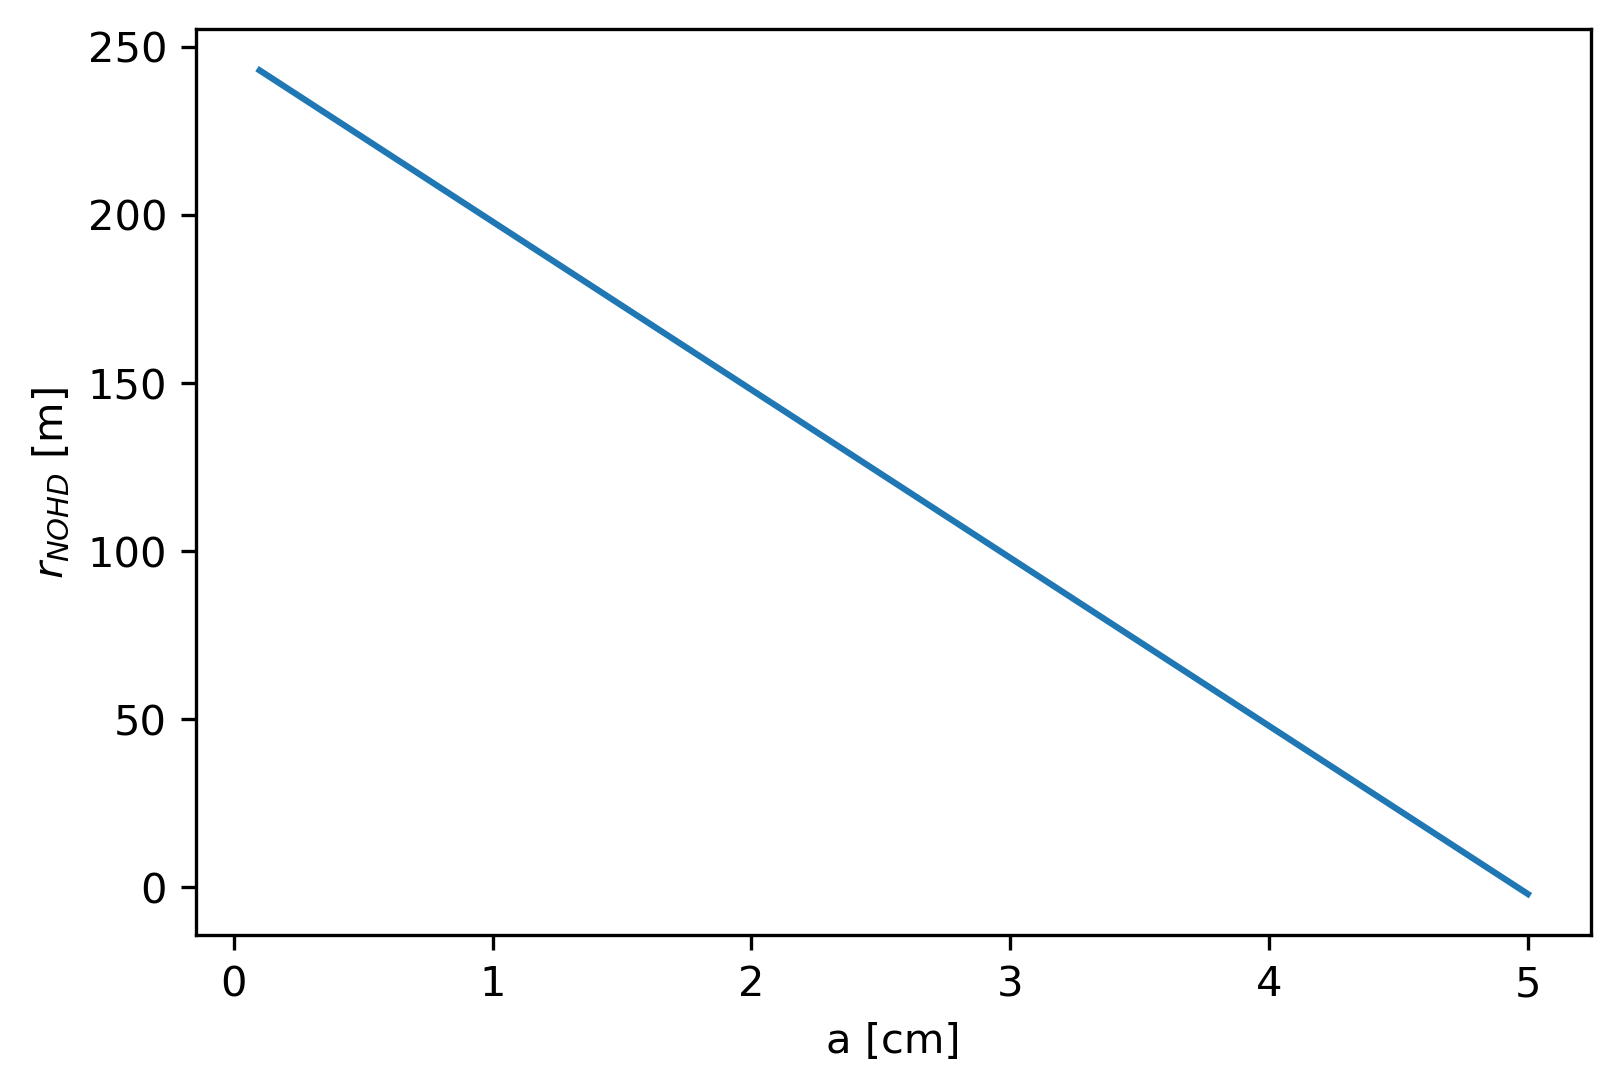

In [6]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(a_range, r_NOHD_plot/100)
ax.set_xlabel('a [cm]')
ax.set_ylabel('$r_{NOHD}$ [m]')
plt.show()

In [9]:
# Plot how NOHD range changes as a function of attenuation for 2 cm beam
X = np.linspace(1, 10, 100)
r_NOHD_plot = 1/phi*(np.sqrt(4*Phi/X/np.pi/(MPE_p*1e3))-a)  # [cm] NOHD range

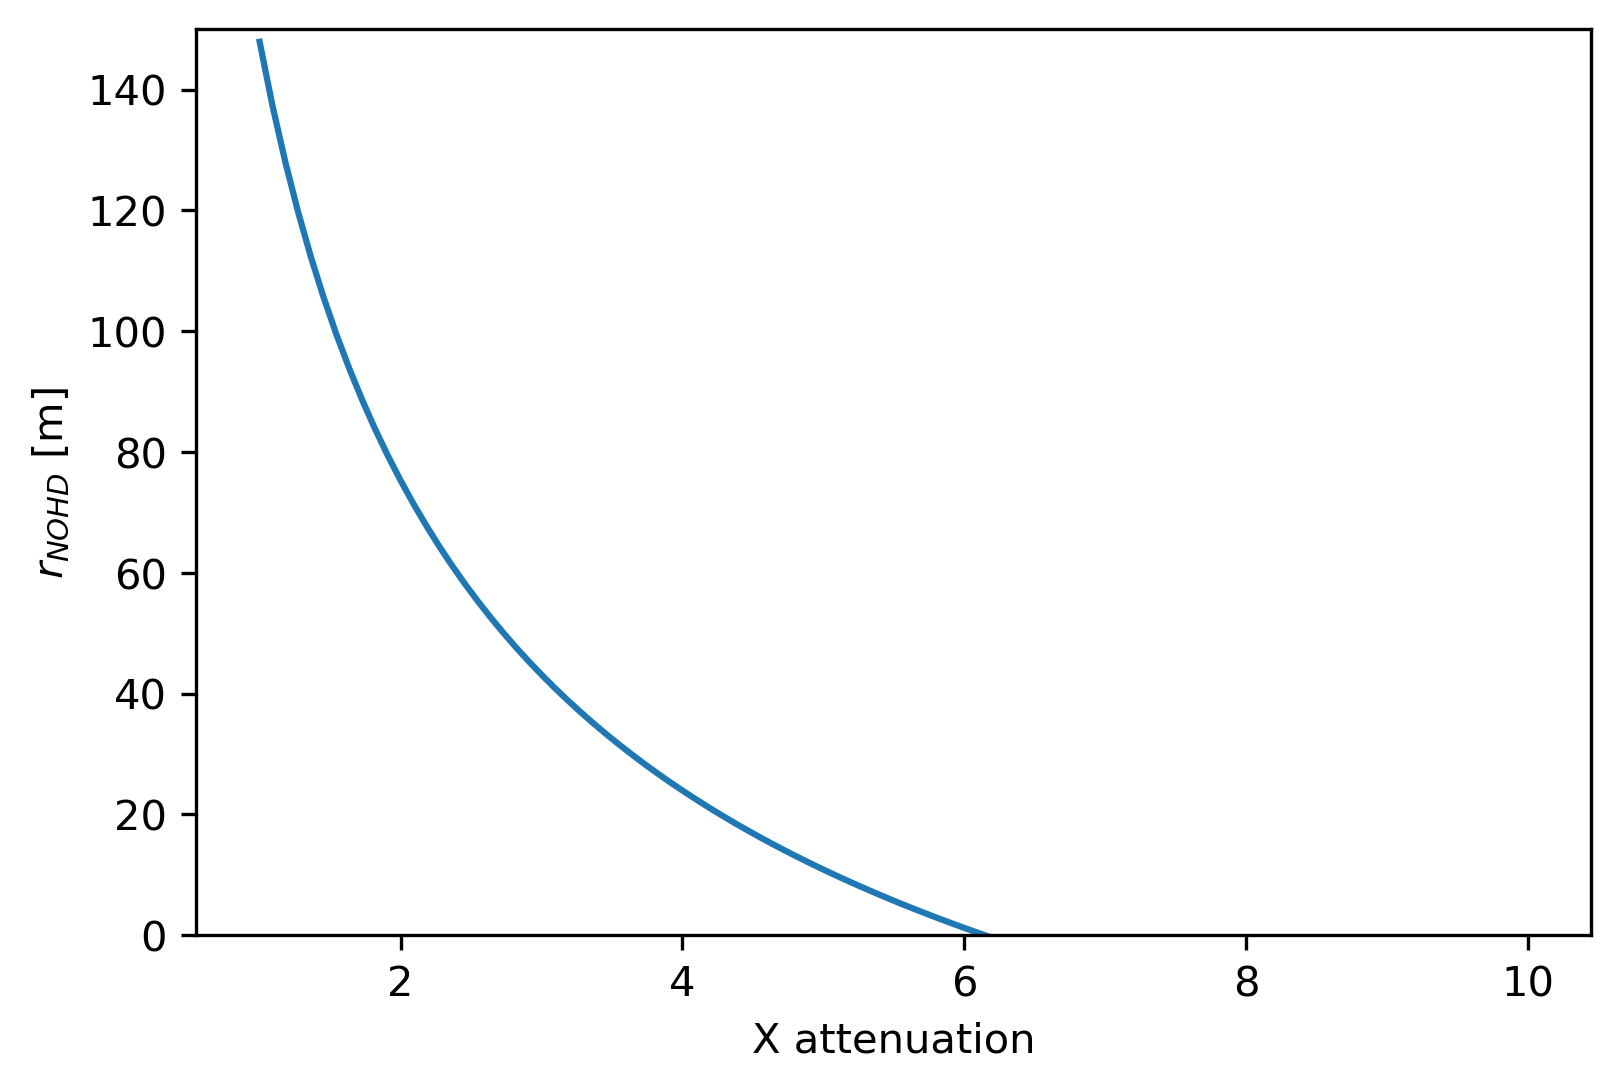

In [10]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(X, r_NOHD_plot/100)
ax.set_xlabel('X attenuation')
ax.set_ylabel('$r_{NOHD}$ [m]')
ax.set_ylim([0, 150])
plt.show()